# Introduction

# Methods Section - Gradient Descent

The vanilla Gradient Descent (GD) method optimizes functions by first computing the gradient of the function. Geometrically, the gradient indicates the direction of the steepest ascent. By negating the gradient and multiplying it by a constant learning rate $\alpha$, the algorithm gradually moves the function towards its minimum value.

Mathematically, we can write it as:

$$
\theta^{(t+1)} = \theta^{(t)} - \alpha \, \nabla_{\theta} F(\theta^{(t)})
$$

where  
- $\theta^{(t)}$ are the parameters at iteration $t$
- $\alpha$ is the learning rate  
- $\nabla_{\theta} F(\theta^{(t)})$ is the gradient of the function with respect to $\theta$.  

### Pseudocode

$F(·):=$ Objective function  
$x:=$ Input

Do  
$\hspace{2em}x_{prev}=x $  
$\hspace{2em}x= x_{prev} - \alpha\nabla F(x_{prev}) $

While $ |x - x_{prev}| < \epsilon $ 

return $x$

### Example Code

We first define base classes for C1 and C2 differentiable functions

In [32]:
import numpy as np

class C1Differentiable:
    """base class for C1-differentiable functions."""

    def __init__(self):
        self.__history = []

    def get_history(self):
        return np.array(self.__history)
    
    def add_history(self, x):
        self.__history.append(x)

    def clear_history(self):
        self.__history = []

    def derivative(self, x):
        pass

    def forward(self, x):
        pass



class C2Differentiable(C1Differentiable):
    """base class for C2-differentiable functions."""

    def second_derivative(self, x):
        pass

In [34]:
class GradientDescent:
    """Gradient Descent optimizer."""

    def __init__(self, f: C1Differentiable, x0, alpha=0.01, tol=1e-6, max_iter=2000):
        super().__init__()

        self.f = f # function to minimize
        self.x = x0 # initial point
        self.alpha = alpha # learning rate
        self.tol = tol # tolerance for stopping criterion
        self.max_iter = max_iter # maximum number of iterations

    def optimize(self):
        self.f.clear_history()
        
        for _ in range(self.max_iter):
            grad = self.f.derivative(self.x)
            y = self.f.forward(self.x)

            new_x = self.x - self.alpha * grad
            self.f.add_history([self.x[0], self.x[1], y])
            
            if abs(self.f.forward(new_x) - self.f.forward(self.x)) < self.tol:
                break
            self.x = new_x

        return self.x

# Methods Section - Newton's Method 


Newton's method outperforms vanilla Gradient Descent by introducing an adaptive learning rate. Instead of using a fixed learning rate $\alpha$, Newton's method replaces it with the inverse of the Hessian matrix. This allows the step size to adapt to the local curvature of the function: when the curvature is steep, the algorithm takes smaller steps; when the curvature is flat, it takes larger steps. This adaptive adjustment effectively mitigates the zig-zag problem commonly observed in Gradient Descent.  

Mathematically, we can write it as:

$$
\theta^{(t+1)} = \theta^{(t)} - H^{-1}(\theta^{(t)}) \, \nabla_{\theta} F(\theta^{(t)})
$$

where  
- $\theta^{(t)}$ are the parameters at iteration $t$  
- $H(\theta^{(t)})$ is the Hessian matrix of second derivatives at iteration $t$  
- $ \nabla_{\theta} F(\theta^{(t)}) $ is the gradient of the function with respect to $\theta$.

### Pseudocode

$F(·):=$ Objective function  
$x:=$ Input

Do  
$\hspace{2em}x_{prev}=x $  
$\hspace{2em}x= x_{prev} - H^{-1}(x_{prev}) \, \nabla F(x_{prev}) $

While $ |x - x_{prev}| < \epsilon $ 

return $x$

### Example Code

In [70]:
class GradientDescentNewton:
    """Gradient Descent optimizer."""

    def __init__(self, f: C1Differentiable, x0, tol=1e-6, max_iter=2000):
        super().__init__()
        
        self.f = f # function to minimize
        self.x = x0 # initial point
        self.tol = tol # tolerance for stopping criterion
        self.max_iter = max_iter # maximum number of iterations

    def optimize(self):
        self.f.clear_history()

        for _ in range(self.max_iter):
            grad = self.f.derivative(self.x)
            H_inverse = np.linalg.inv(self.f.second_derivative(self.x))
            y = self.f.forward(self.x)

            new_x = self.x - H_inverse @ grad
            self.f.add_history([self.x[0], self.x[1], y])
            
            if abs(self.f.forward(new_x) - self.f.forward(self.x)) < self.tol:
                break

            self.x = new_x
            
        return self.x

# Methods Section - AdaGrad

# Methods Section - Adam

# Results Section - Convex bowl

We first define a Convex bowl class. Then, we selected three random initial points $(-1, 2), (-2, 0.5)$ and $(3, 3)$ with step sizes of $0.1, 0.01, 0.001$

In [71]:
class ConvexBowl(C2Differentiable):
    """Convex bowl function."""

    def forward(self, x):
        return x[0]**2 + x[1]**2

    def derivative(self, x):
        return np.array([2*x[0], 2*x[1]])
    
    def second_derivative(self, x):
        return np.array([[2, 0], [0, 2]])

In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Plot3D(f, history):
    # Surface grid
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)

    # generate surface
    Z = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f(np.array([X[i, j], Y[i, j]]))

    # Create 3D plot
    fig = plt.figure(figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, Y, Z, alpha=0.3, linewidth=0, antialiased=True)

    #Create path
    ax.plot3D(history[:,0], history[:,1], history[:, 2], linewidth=2)  # line
    ax.scatter3D(history[:,0], history[:,1], history[:, 2], s=18)


    plt.tight_layout(); plt.show()



### Following code demonstrates the results of Vanilla GD

In [64]:
def VanillaGDPlot(x0):
    f = ConvexBowl()

    #alpha 0.1
    optimizer = GradientDescent(f, x0, alpha=0.1)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters alpha 0.1 :", result)
    Plot3D(f.forward, history)

    #alpha 0.01
    optimizer = GradientDescent(f, x0, alpha=0.01)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters alpha 0.01 :", result)
    Plot3D(f.forward, history)

    #alpha 0.001
    optimizer = GradientDescent(f, x0, alpha=0.001)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters alpha 0.001 :", result)
    Plot3D(f.forward, history)

Initial point $(-1, 2)$, step size $0.1, 0.01$ and $0.001$

Optimized parameters alpha 0.1 : [-0.00063383  0.00126765]


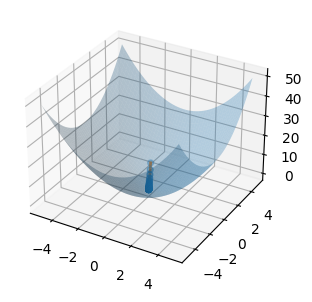

Optimized parameters alpha 0.01 : [-0.00224014  0.00448028]


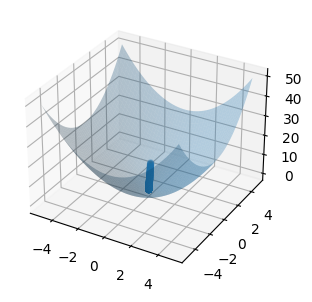

Optimized parameters alpha 0.001 : [-0.01824243  0.03648485]


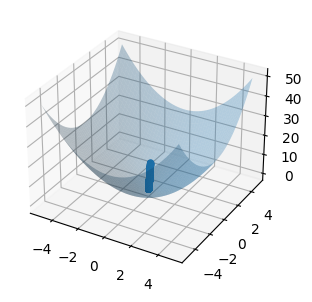

In [65]:
VanillaGDPlot(np.array([-1.0, 2.0]))

Initial point $(-2, 0.5)$, step size $0.1, 0.01$ and $0.001$

Optimized parameters alpha 0.1 : [-0.00158456  0.00039614]


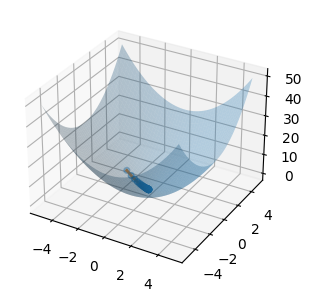

Optimized parameters alpha 0.01 : [-0.00485736  0.00121434]


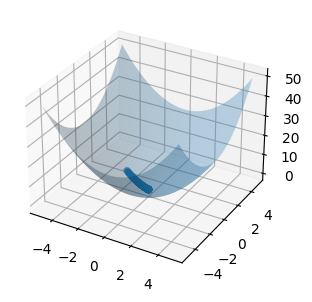

Optimized parameters alpha 0.001 : [-0.03648485  0.00912121]


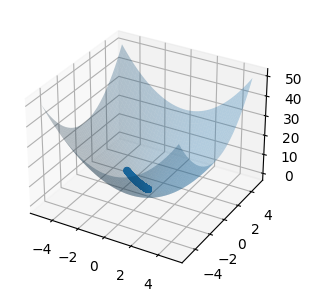

In [66]:
VanillaGDPlot(np.array([-2.0, 0.5]))

Initial point $(3, 3)$, step size $0.1, 0.01$ and $0.001$

Optimized parameters alpha 0.1 : [0.00097356 0.00097356]


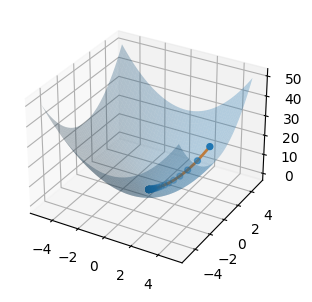

Optimized parameters alpha 0.01 : [0.00352071 0.00352071]


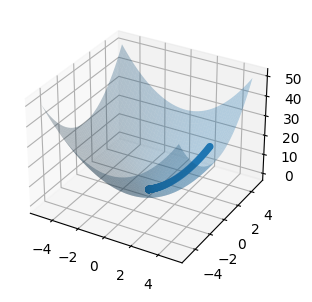

Optimized parameters alpha 0.001 : [0.05472728 0.05472728]


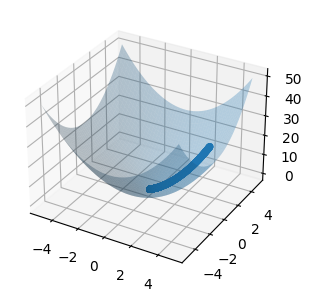

In [67]:
VanillaGDPlot(np.array([3, 3]))

### Following code demonstrates the results of GD - Newton's Method

In [74]:
def GDNewtonPlot(x0):
    f = ConvexBowl()

    #alpha 0.1
    optimizer = GradientDescentNewton(f, x0)
    result = optimizer.optimize()
    history = f.get_history()

    print("Optimized parameters ", x0, result)
    Plot3D(f.forward, history)

Initial points $(-1, 2), (-2, 0.5)$ and $(3, 3)$

Optimized parameters  [-1  2] [0. 0.]


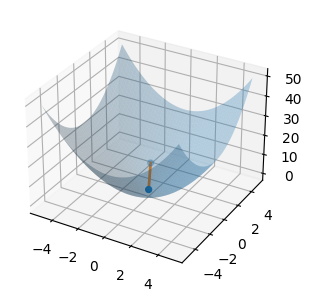

Optimized parameters  [-2.   0.5] [0. 0.]


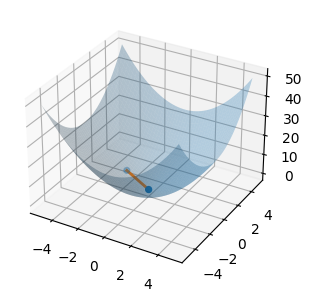

Optimized parameters  [3 3] [0. 0.]


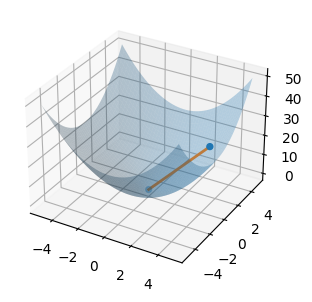

In [75]:
GDNewtonPlot(np.array([-1, 2]))
GDNewtonPlot(np.array([-2, 0.5]))
GDNewtonPlot(np.array([3, 3]))

# Results Section - Rosenbrock

We first define a Rosenbrock class. Then, we selected three random initial points $(-3, 4), (2.5, -2.5)$ and $(0, 4)$ with step sizes of $0.1, 0.01, 0.001$

In [ ]:
class Rosenbrock(C2Differentiable):
    """Rosenbrock function."""

    def forward(self, x):
        return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

    def derivative(self, x):
        dfdx0 = -2 * (1 - x[0]) - 400 * x[0] * (x[1] - x[0]**2)
        dfdx1 = 200 * (x[1] - x[0]**2)
        return np.array([dfdx0, dfdx1])
    
    def second_derivative(self, x):
        d2fdx0_2 = 2 - 400 * (x[1] - x[0]**2) + 800 * x[0]**2
        d2fdx1_2 = 200
        d2fdx0dx1 = -400 * x[0]
        return np.array([[d2fdx0_2, d2fdx0dx1], [d2fdx0dx1, d2fdx1_2]])

# Results Section - Multimodal non-convex

We first define a MultiModalNonConvex class. Then, we selected three random initial points $(3, 4), (2.5, 4)$ and $(4, 4)$ with step sizes of $0.1, 0.01, 0.001$

In [ ]:
class MultimodalNonConvex(C2Differentiable):
    """Multimodal Non-Convex function."""

    def forward(self, x):
        pass

    def derivative(self, x):
        pass
    
    def second_derivative(self, x):
        pass